In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils.config import CONFIG

SyntaxError: invalid syntax (config.py, line 22)

In [ ]:
# 두 번째 셀: 시각화 함수 정의
def visualize_anomaly_data(rpm_type='rpm_1200', model_type='vibration'):
    # 설정 불러오기
    rpm_config = CONFIG[rpm_type]
    processed_dir = rpm_config['processed_data_dir']
    
    # 테스트 파일 찾기
    for file_name in os.listdir(processed_dir):
        if file_name.startswith('anomalous_'):
            file_path = os.path.join(processed_dir, file_name)
            print(f"파일: {file_name}")
            
            # 데이터 로드
            df = pd.read_csv(file_path)
            
            # 이상치 구간 찾기
            anomaly_start_indices = df.index[df['label'].diff() == 1].tolist()
            anomaly_end_indices = df.index[df['label'].diff() == -1].tolist()
            
            if len(anomaly_start_indices) > 0:
                # 첫 번째 이상 구간의 앞뒤 250포인트씩 시각화
                start_idx = max(0, anomaly_start_indices[0] - 250)
                end_idx = min(len(df), anomaly_end_indices[0] + 250)
                
                window_data = df.iloc[start_idx:end_idx]
                
                # 진동 데이터의 경우 x,y,z 축 모두 표시
                if model_type == 'vibration':
                    features = ['accel_x', 'accel_y', 'accel_z']
                    fig, axes = plt.subplots(3, 1, figsize=(15, 10))
                    fig.suptitle(f'Anomaly Pattern in {file_name}')
                    
                    for ax, feature in zip(axes, features):
                        normal = window_data[window_data['label'] == 0]
                        ax.plot(normal.index, normal[feature], 'b.', label='Normal', markersize=1)
                        
                        anomaly = window_data[window_data['label'] == 1]
                        ax.plot(anomaly.index, anomaly[feature], 'r.', label='Anomaly', markersize=1)
                        
                        ax.set_title(feature)
                        ax.legend()
                
                else:  # voltage, temperature 등 단일 특징
                    feature = model_type
                    plt.figure(figsize=(15, 5))
                    
                    normal = window_data[window_data['label'] == 0]
                    plt.plot(normal.index, normal[feature], 'b.', label='Normal', markersize=1)
                    
                    anomaly = window_data[window_data['label'] == 1]
                    plt.plot(anomaly.index, anomaly[feature], 'r.', label='Anomaly', markersize=1)
                    
                    plt.title(f'Anomaly Pattern in {file_name} - {feature}')
                    plt.legend()
                
                plt.tight_layout()
                plt.show()
                
                # 통계 출력
                print(f"이상 구간: {anomaly_start_indices[0]} ~ {anomaly_end_indices[0]}")
                print(f"전체 데이터 포인트: {len(df)}")
                print(f"이상치 포인트: {len(df[df['label'] == 1])}")

파일: anomalous_vibration_1200-2.csv


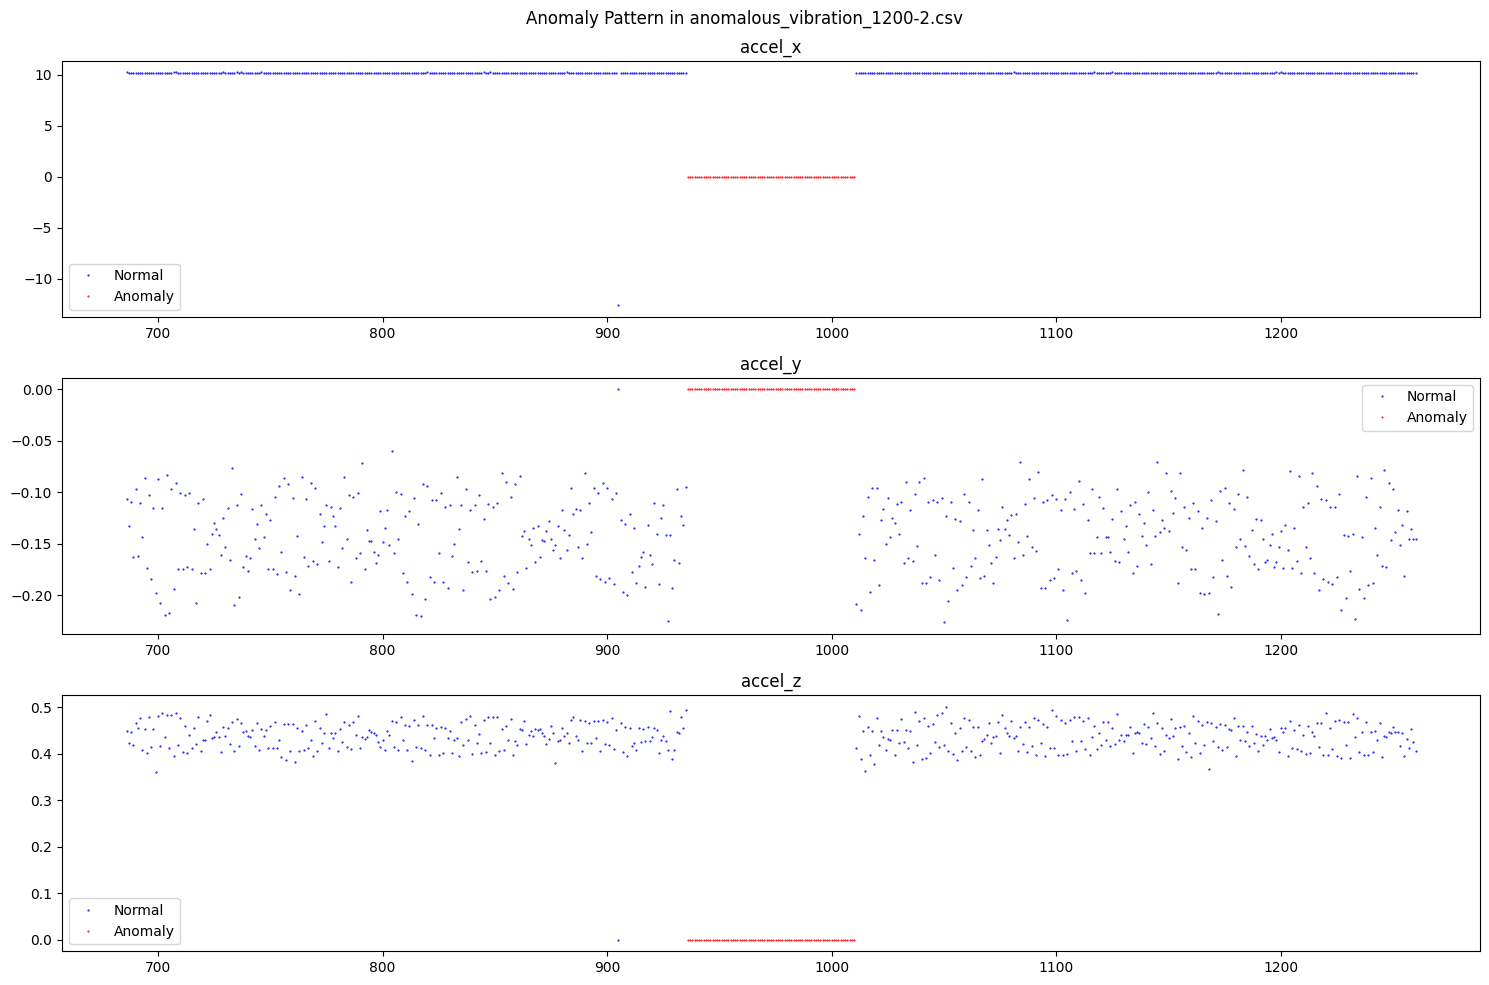

이상 구간: 936 ~ 1011
전체 데이터 포인트: 90001
이상치 포인트: 8489
파일: anomalous_temperature_1200-2.csv


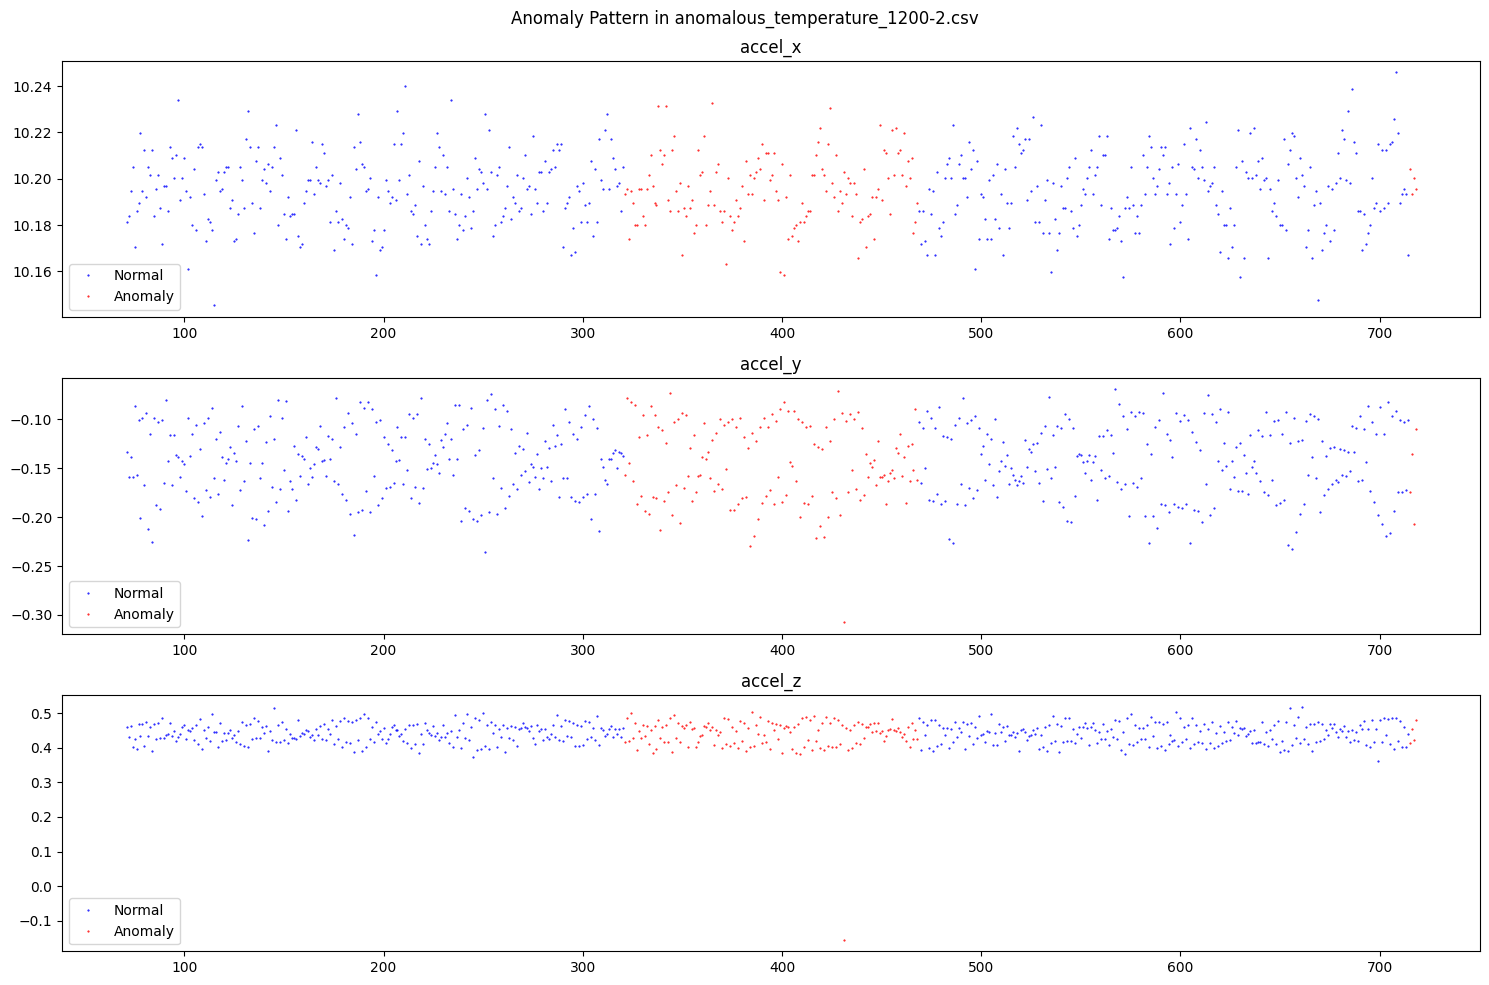

이상 구간: 321 ~ 469
전체 데이터 포인트: 90001
이상치 포인트: 8497
파일: anomalous_voltage_1200-2.csv


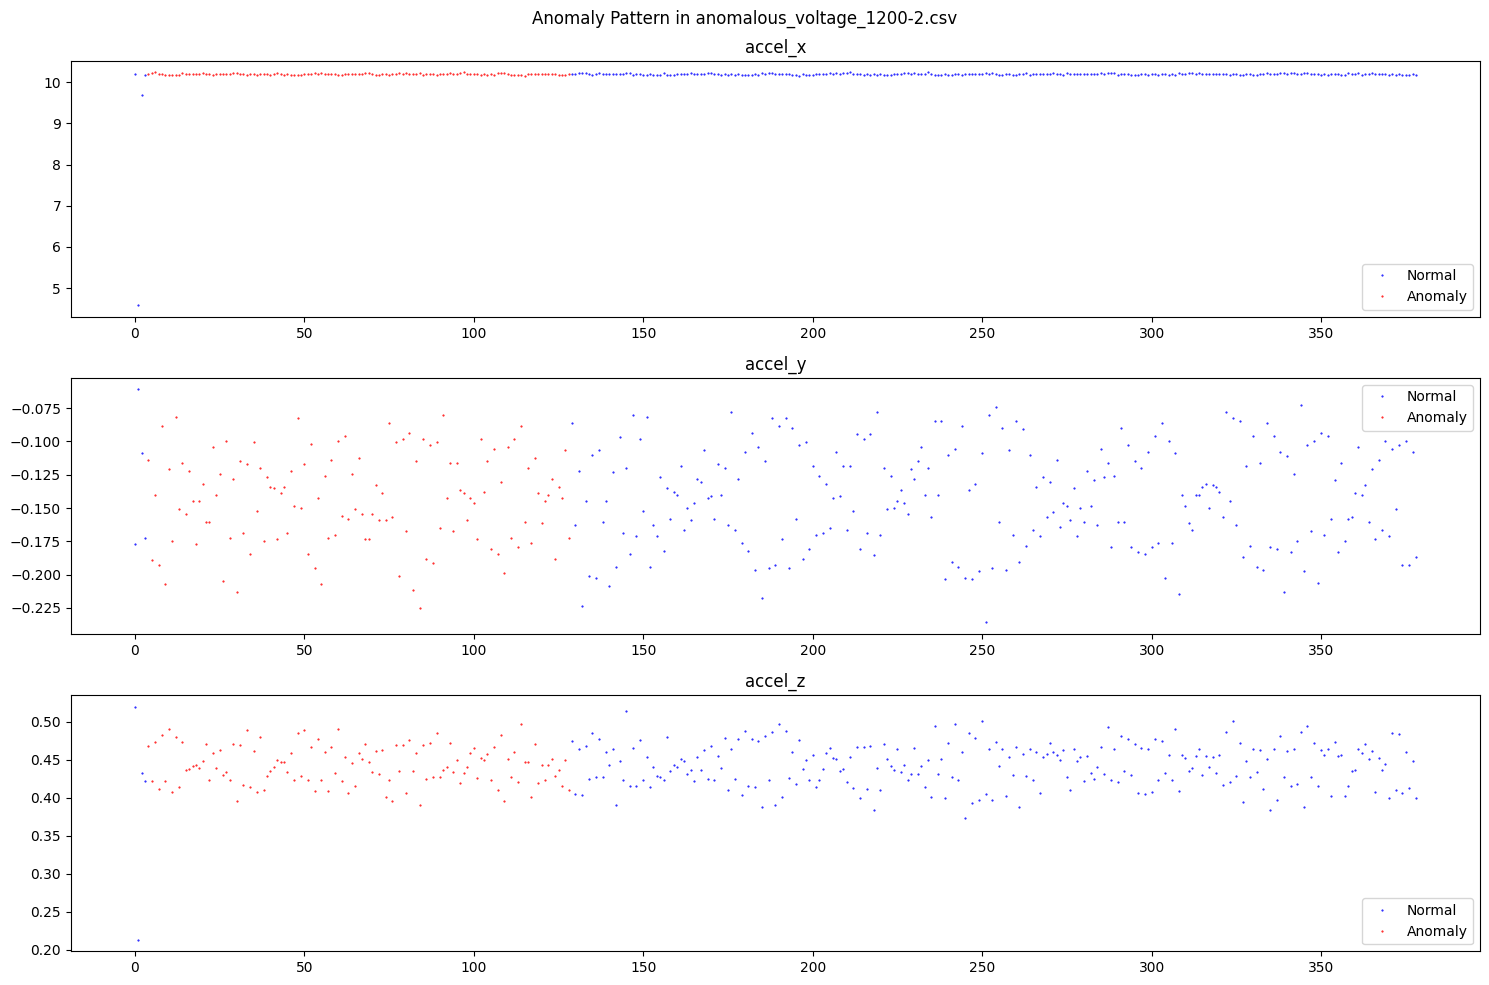

이상 구간: 4 ~ 129
전체 데이터 포인트: 90001
이상치 포인트: 8436
파일: anomalous_rpm_1200-2.csv


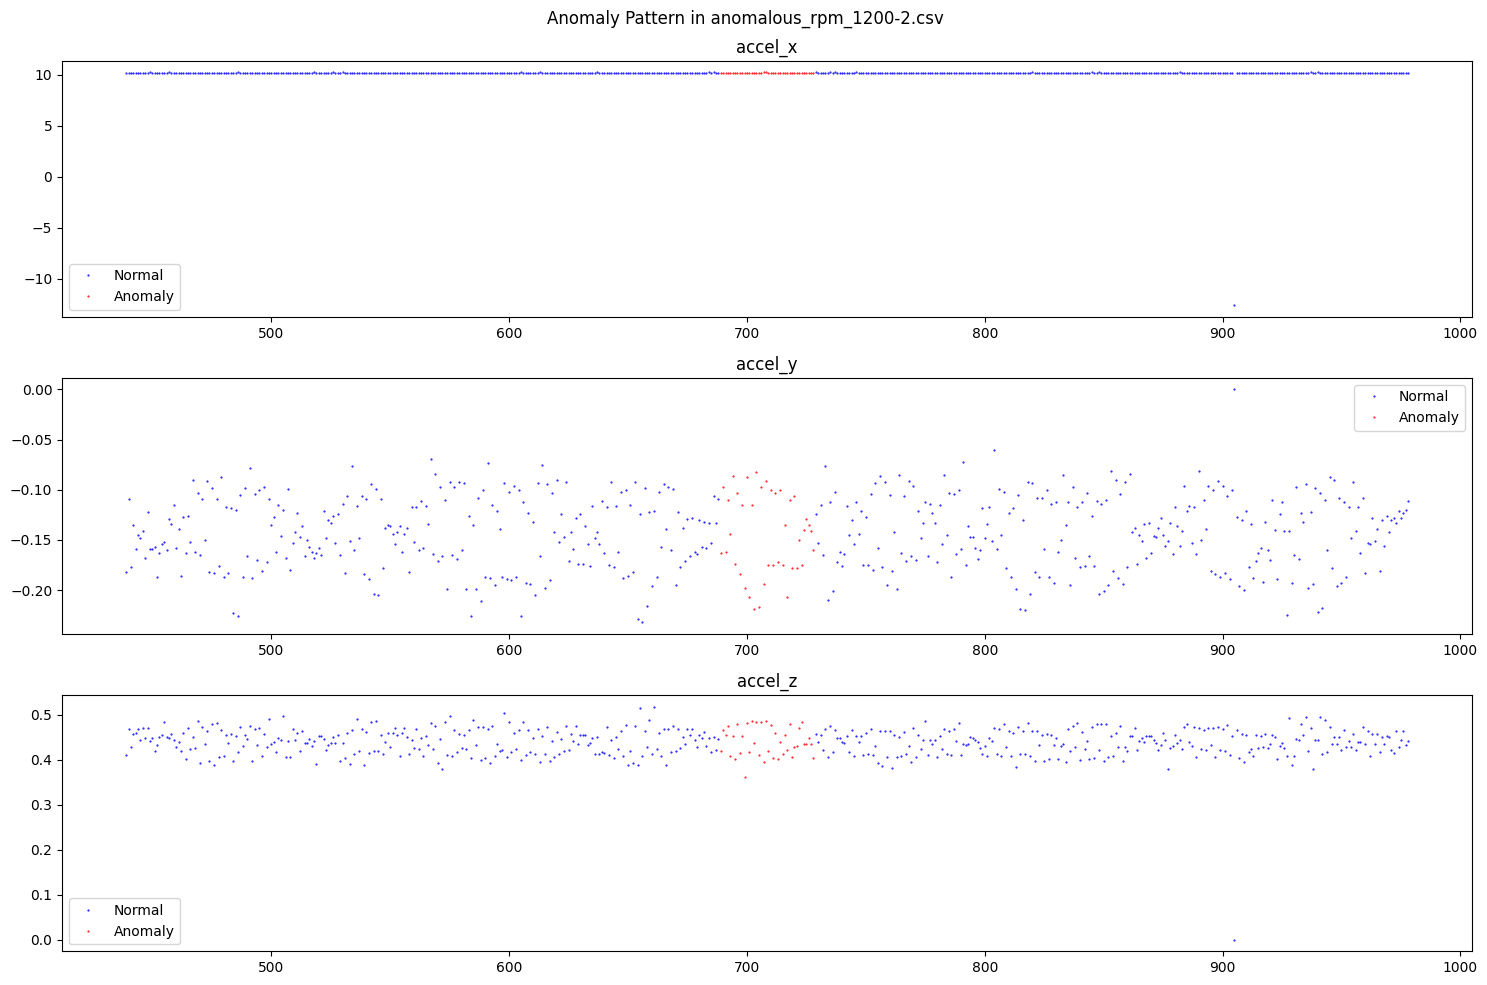

이상 구간: 689 ~ 729
전체 데이터 포인트: 90001
이상치 포인트: 8486
파일: anomalous_1200-2.csv


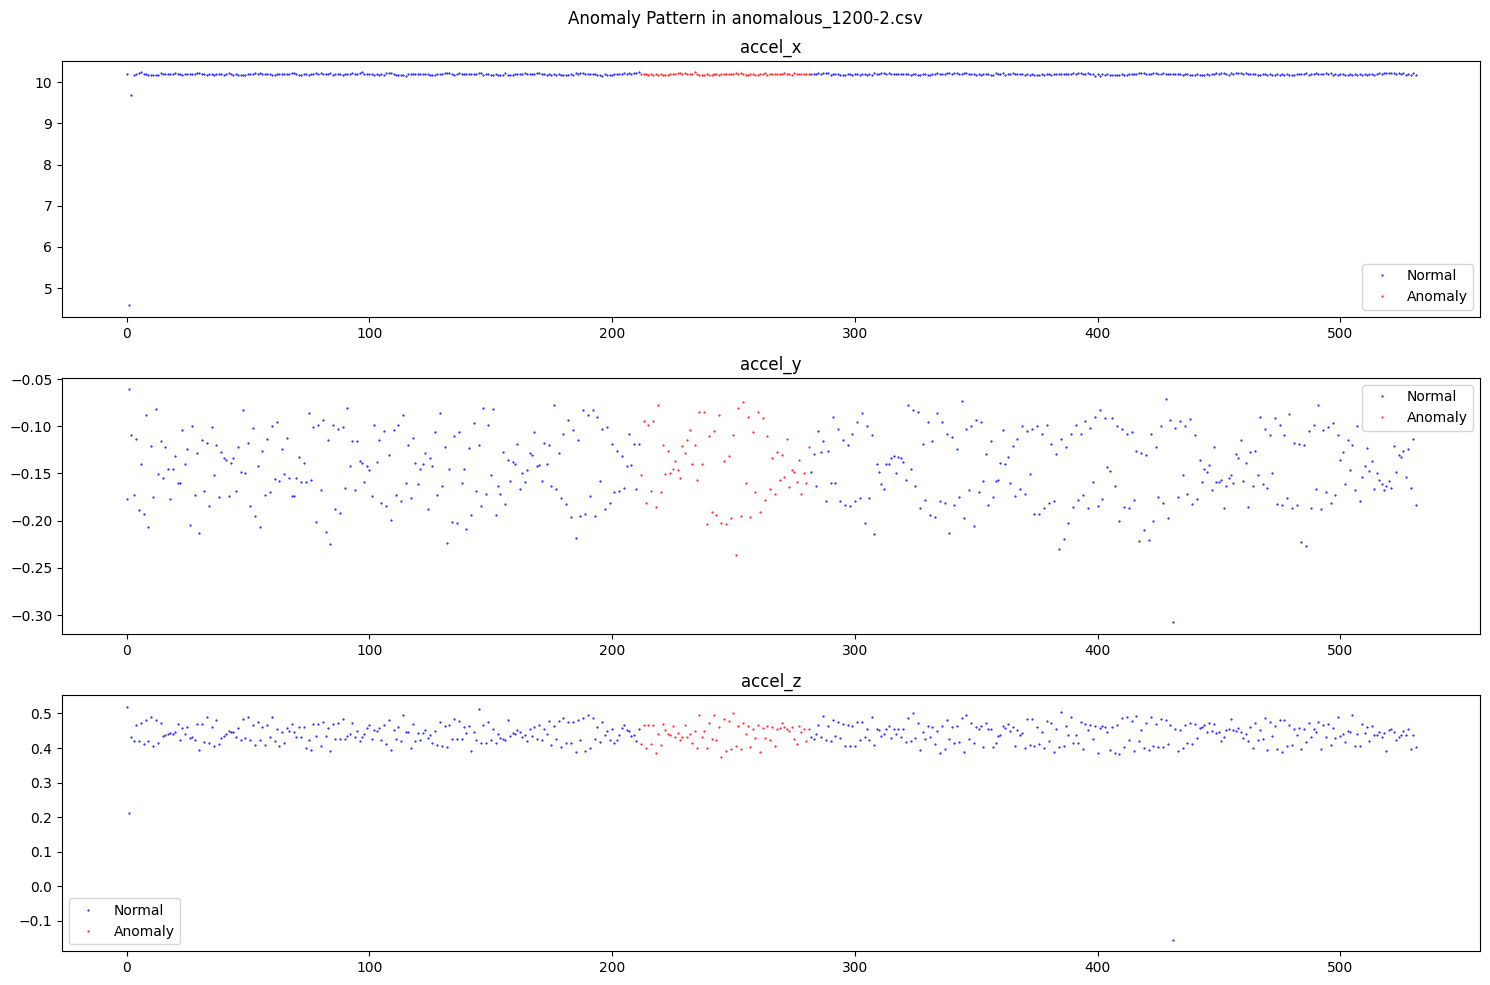

이상 구간: 212 ~ 282
전체 데이터 포인트: 90001
이상치 포인트: 8651


In [ ]:
# 세 번째 셀: 함수 실행
# 진동 데이터 확인
visualize_anomaly_data('rpm_1200', 'vibration')

파일: anomalous_vibration_1200-2.csv


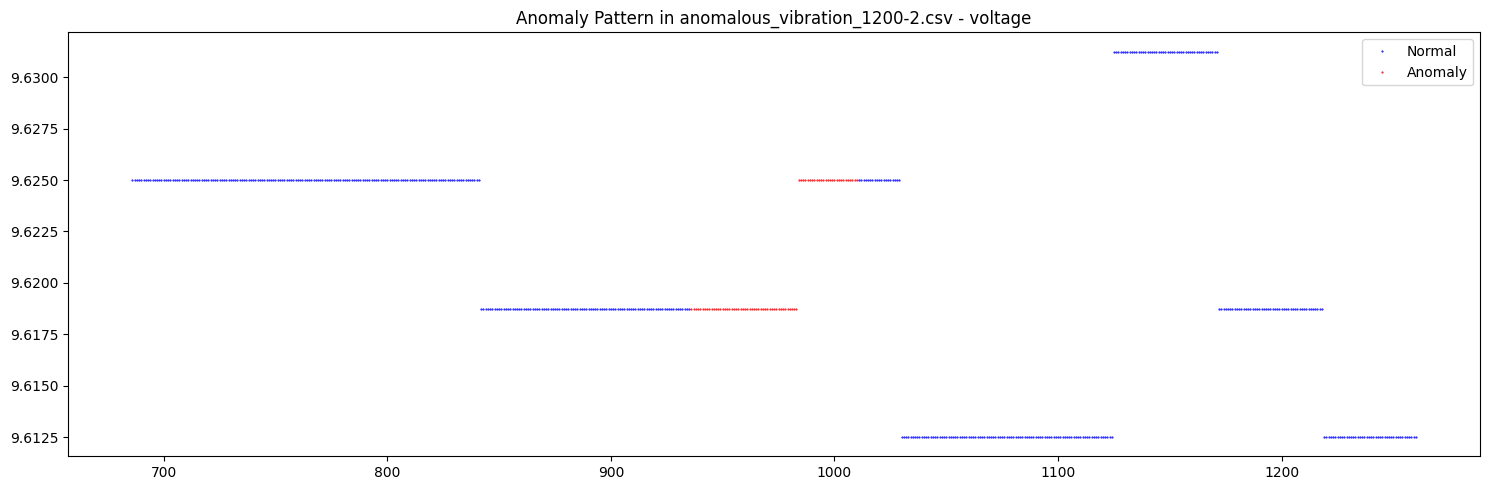

이상 구간: 936 ~ 1011
전체 데이터 포인트: 90001
이상치 포인트: 8489
파일: anomalous_temperature_1200-2.csv


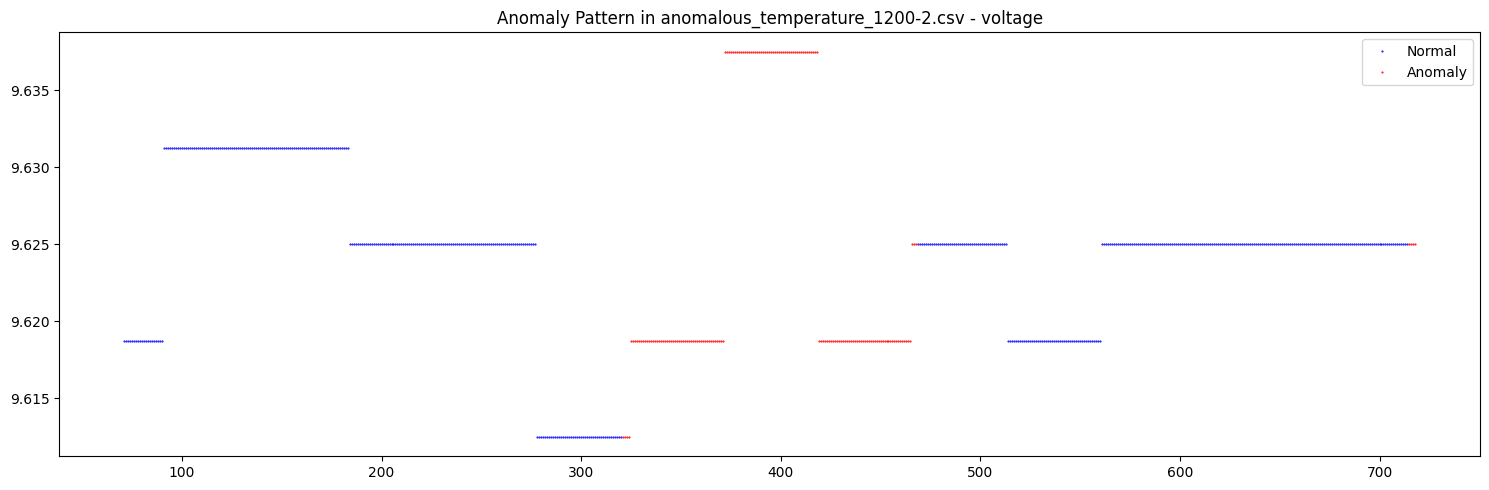

이상 구간: 321 ~ 469
전체 데이터 포인트: 90001
이상치 포인트: 8497
파일: anomalous_voltage_1200-2.csv


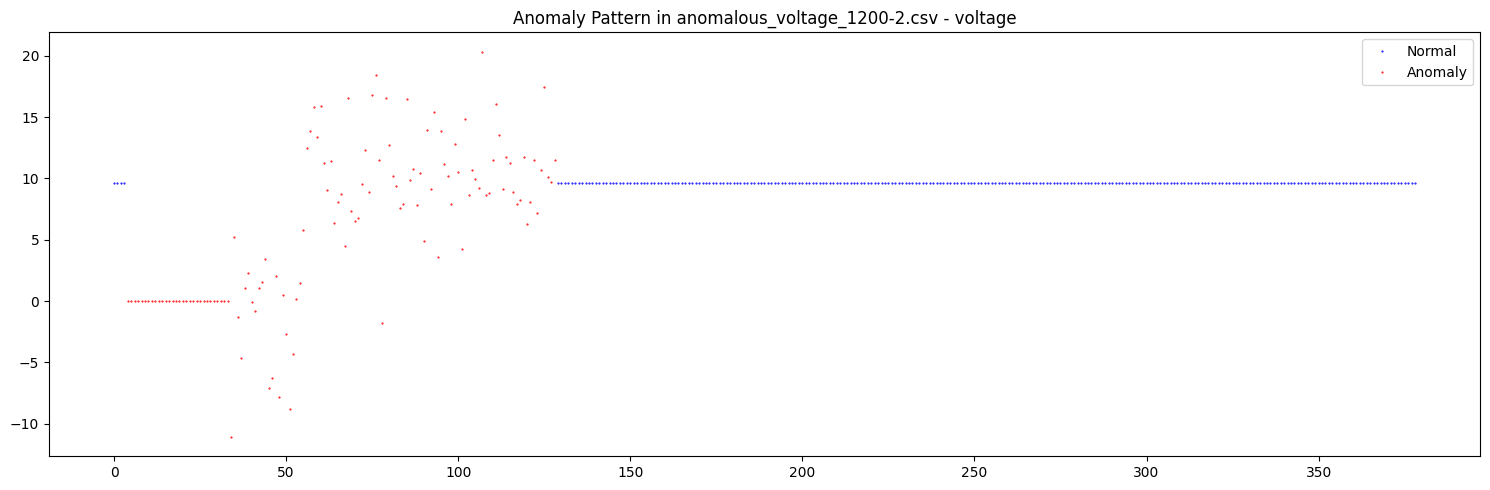

이상 구간: 4 ~ 129
전체 데이터 포인트: 90001
이상치 포인트: 8436
파일: anomalous_rpm_1200-2.csv


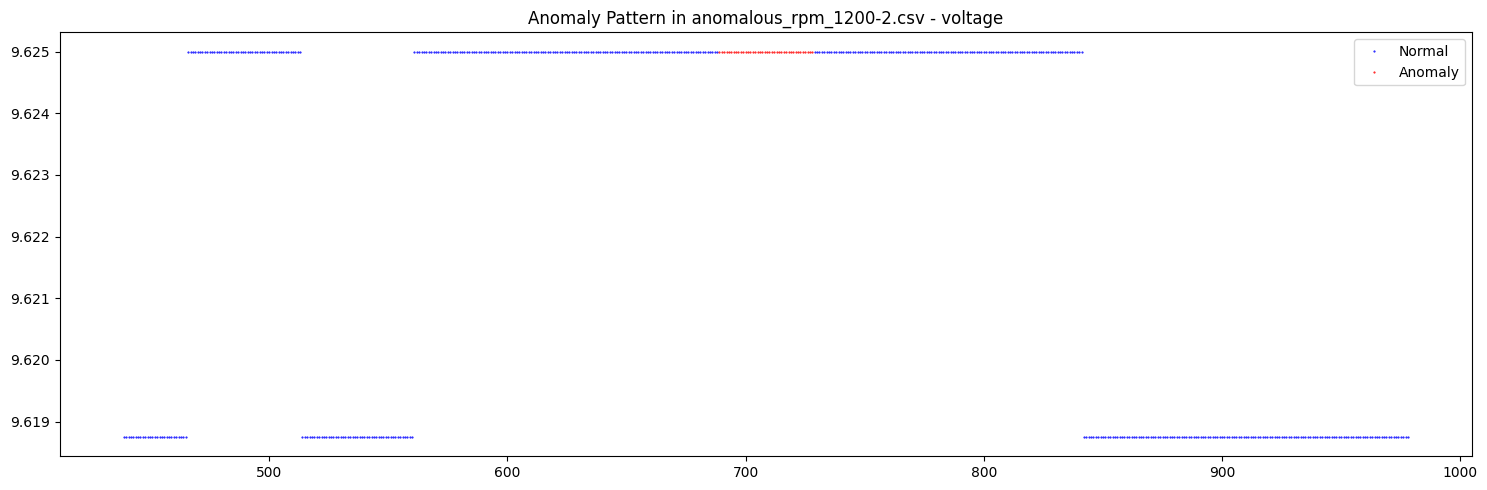

이상 구간: 689 ~ 729
전체 데이터 포인트: 90001
이상치 포인트: 8486
파일: anomalous_1200-2.csv


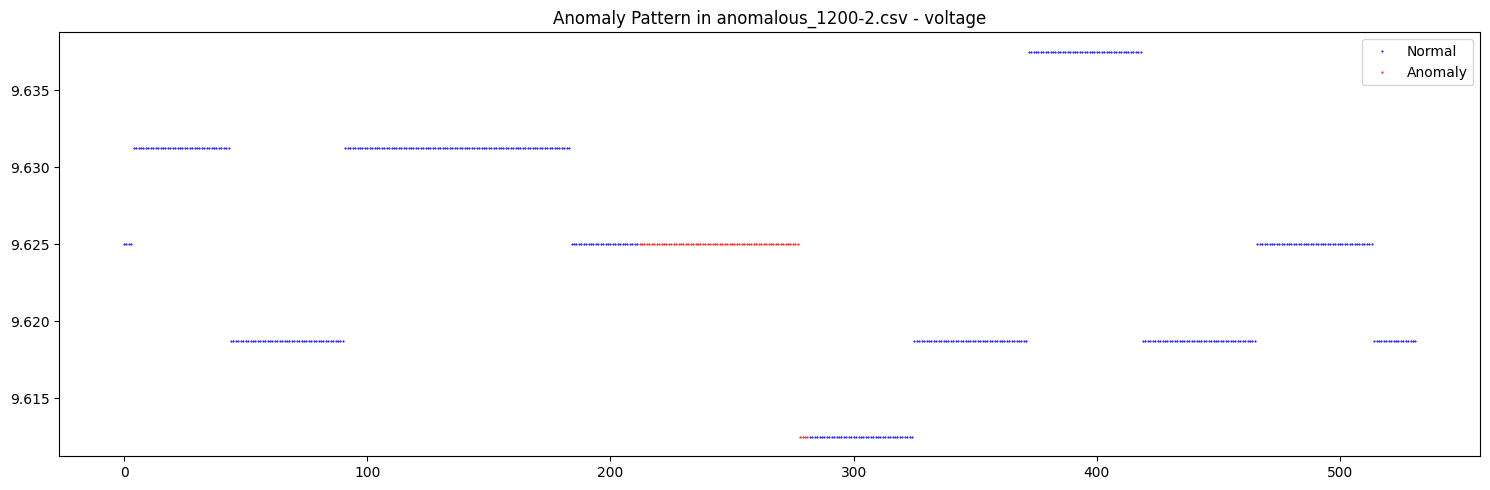

이상 구간: 212 ~ 282
전체 데이터 포인트: 90001
이상치 포인트: 8651


In [ ]:
# 네 번째 셀: 전압 데이터 확인
visualize_anomaly_data('rpm_1200', 'voltage')

파일: anomalous_vibration_1200-2.csv


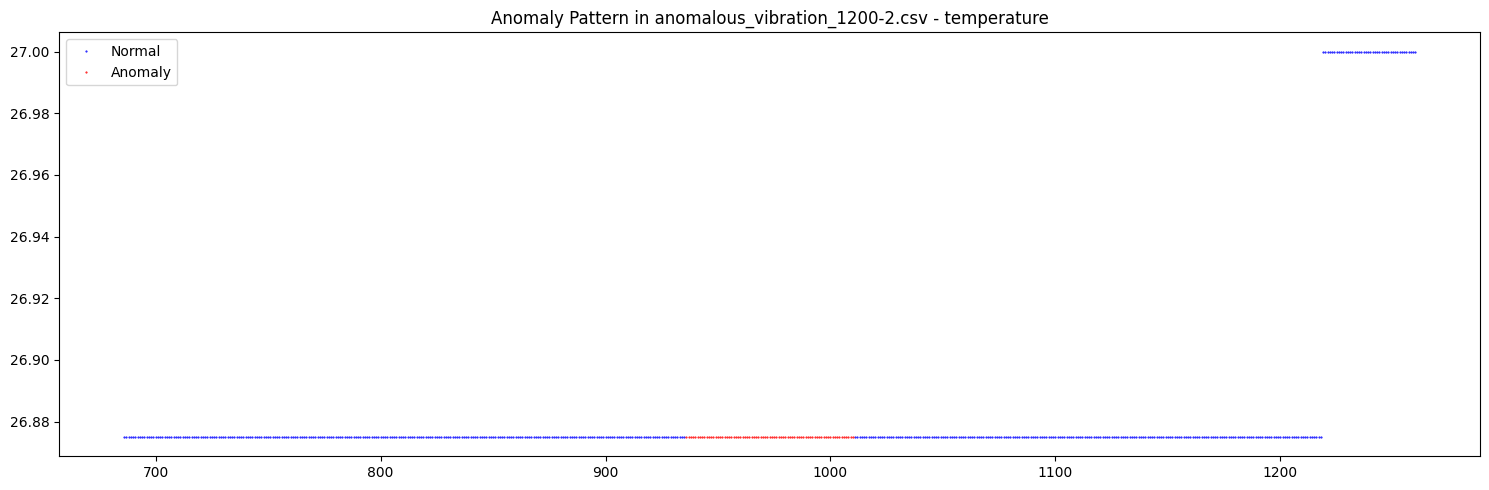

이상 구간: 936 ~ 1011
전체 데이터 포인트: 90001
이상치 포인트: 8489
파일: anomalous_temperature_1200-2.csv


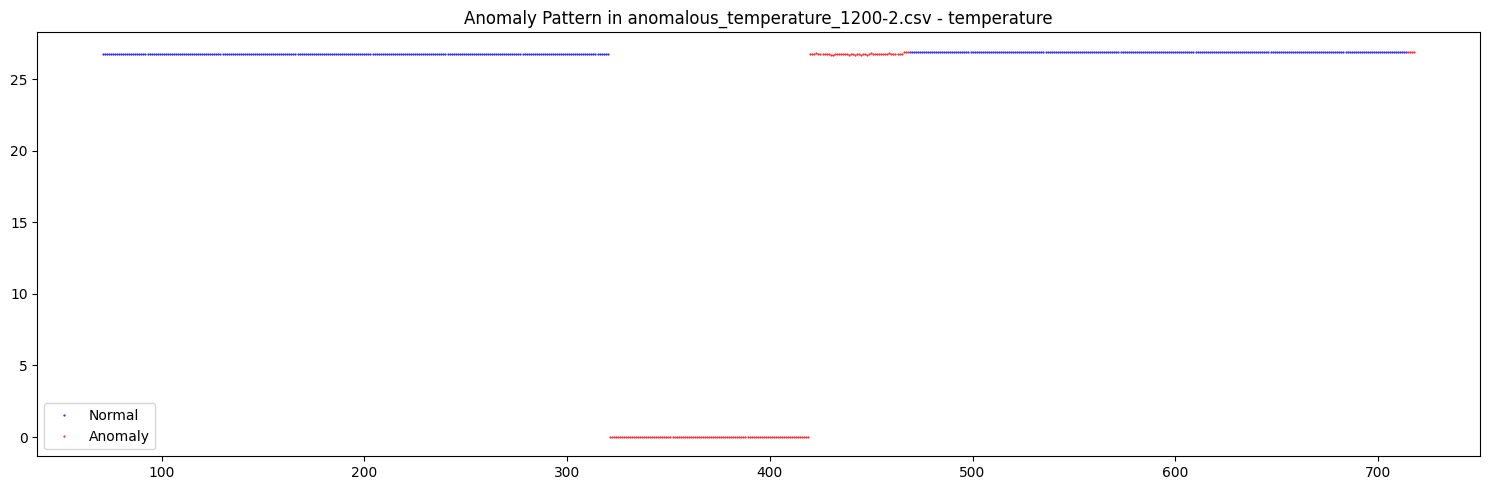

이상 구간: 321 ~ 469
전체 데이터 포인트: 90001
이상치 포인트: 8497
파일: anomalous_voltage_1200-2.csv


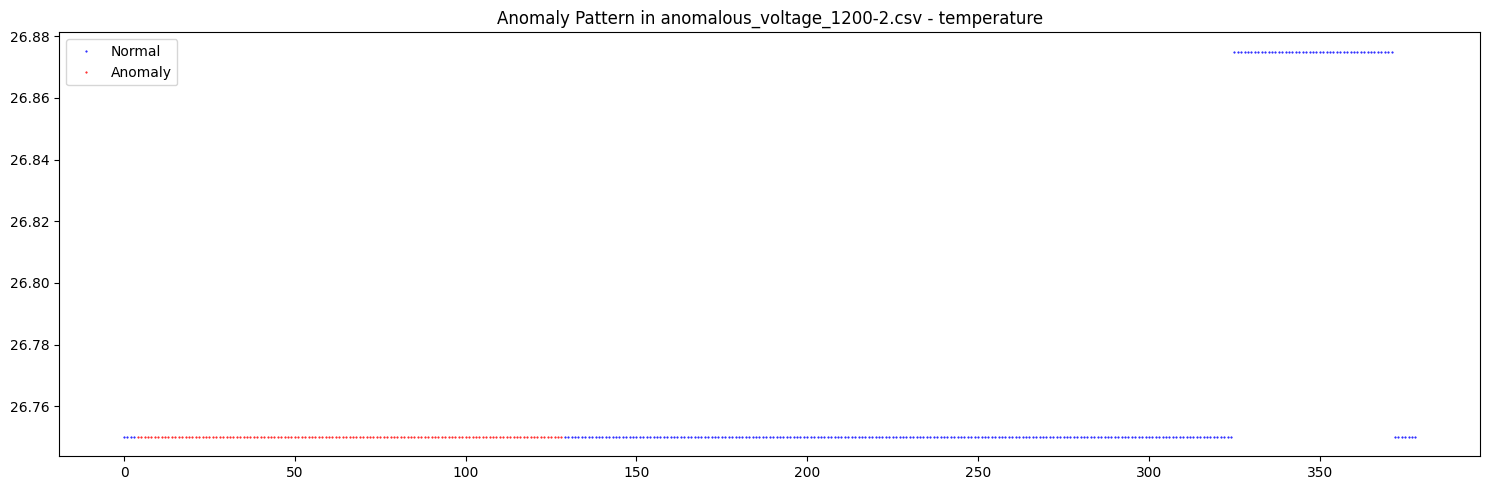

이상 구간: 4 ~ 129
전체 데이터 포인트: 90001
이상치 포인트: 8436
파일: anomalous_rpm_1200-2.csv


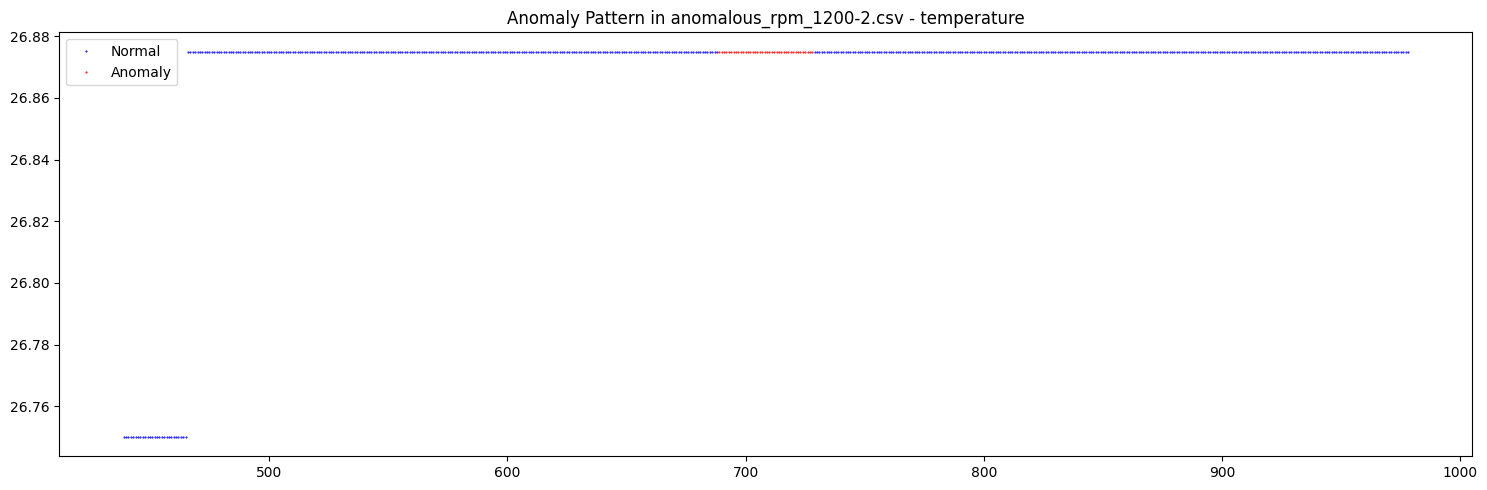

이상 구간: 689 ~ 729
전체 데이터 포인트: 90001
이상치 포인트: 8486
파일: anomalous_1200-2.csv


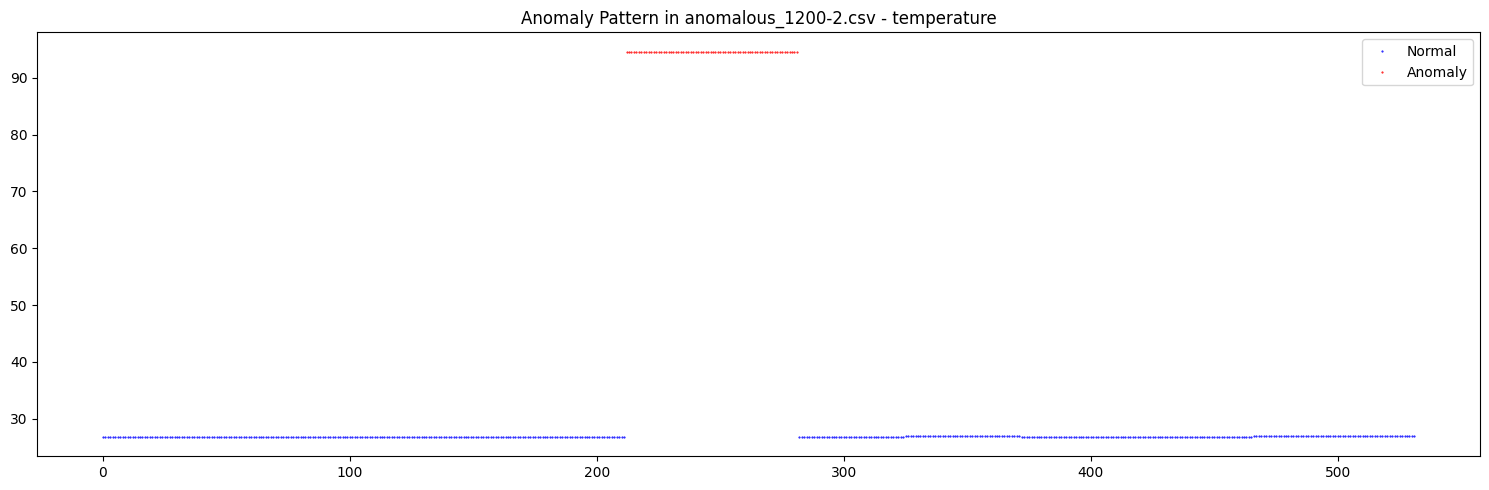

이상 구간: 212 ~ 282
전체 데이터 포인트: 90001
이상치 포인트: 8651


In [ ]:
# 다섯 번째 셀: 온도 데이터 확인
visualize_anomaly_data('rpm_1200', 'temperature')